# Assignment 1

# Part A: Analysing Text Data

In [1]:
#Importing necessary Libraries
import re #For using regex while substituting
import matplotlib.pyplot as plt # For Plotting Graphs
from nltk.corpus import stopwords #For removing stopwords
from math import log10 # For fiding the log values to the base 10
from pyspark import SparkContext, SparkConf # Spark
from pyspark.sql import SparkSession # Spark SQL

## Step 01: Import pyspark and initialize Spark

In [2]:
sc = SparkContext.getOrCreate()

if (sc is None):
    sc = SparkContext(master="local[*]", appName="Book Proccessing App")
spark = SparkSession(sparkContext=sc)

## Step 02: Create Resilient Distributed Datasets (RDDs)

### For Scrum Handbook (Book1)

In [3]:
scrumHandbookRdd = sc.textFile('Scrum Handbook.txt')
scrumHandbookRdd.collect()

["Jeff Sutherland's ",
 '',
 'Scrum Handbook ',
 '',
 '',
 '',
 '',
 'Everything ',
 'you need ',
 'to know ',
 'to start ',
 '',
 'a Scrum project ',
 'in your ',
 'organization ',
 '',
 'SCRUM ',
 '',
 'TRAINING ',
 '',
 'INSTITUTE ',
 '',
 'm w press ',
 '',
 '',
 '',
 'This book is dedicated to Nobel Laureate Muhammad Yunus and the ',
 'Grameen Bank for originating microenterprise development and the ',
 "Accion International President's Advisory Board, responsible for much of ",
 'microenterprise development in the western hemisphere. ',
 '',
 'The strategy for bootstrapping the poor out of poverty has been ',
 'a model for freeing hundreds of thousands of software developers from ',
 'developer abuse caused by poor management practices. ',
 '',
 'Thanks to the reviewers of the text who include among many others: ',
 '',
 '• Tom Poppendieck ',
 '',
 '• Hen rick Kniberg ',
 '',
 '• Rowan Bunning ',
 '',
 '• Clifford Thompson ',
 '',
 '',
 '',
 'About this book ',
 '',
 'This manual

In [4]:
print("The Total No of Lines in Scrum Handbook is ",scrumHandbookRdd.count())

The Total No of Lines in Scrum Handbook is  4617


### For Agile Processes in Software Engineering and Extreme Programming (Book2)

In [5]:
agileRdd = sc.textFile('Agile Processes  in Software Engineering  and Extreme Programming.txt')
agileRdd.collect()

['LNBIP251 ',
 '',
 '',
 'I Helen Sharp ',
 '',
 'Tracy Hall (Eds.) ',
 '',
 'Agile Processes ',
 'in Software Engineering ',
 'and Extreme Programming ',
 '',
 '17th International Conference, XP 2016 ',
 'Edinburgh, UK, May 24-27,2016 ',
 'Proceedings ',
 '',
 '',
 '4^ Springer Open ',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Lecture Notes ',
 '',
 'in Business Information Processing 251 ',
 '',
 '',
 'Series Editors ',
 '',
 'Wil van der Aalst ',
 '',
 'Eindhoven Technical University, Eindhoven, The Netherlands ',
 'John Mylopoulos ',
 '',
 'University of Trento, Povo, Italy ',
 'Michael Rosemann ',
 '',
 'Queensland University of Technology, Brisbane, QLD, Australia ',
 'Michael J. Shaw ',
 '',
 'University of Illinois, Urbana-Champaign, IL, USA ',
 'Clemens Szyperski ',
 '',
 'Microsoft Research, Redmond, WA, USA ',
 '',
 '',
 '',
 'More information about this series at http://www.springer.com/series/7911 ',
 '',
 '',
 '',
 'Helen Sharp • Tracy Hall (Eds.) ',
 '',
 '',
 'Agile Processe

In [6]:
print("The Total No of Lines in Agile Processes in Software Engineering and Extreme Programming book is",agileRdd.count())

The Total No of Lines in Agile Processes in Software Engineering and Extreme Programming book is 21569


## Step 03: Cleaning/Manipulating text.

### For Scrum Handbook (Book1)

In [7]:
#1. Removes all characters which are not alphabets except space(s).
scrumHandbookRddFormatted = scrumHandbookRdd.map(lambda x: re.sub(r'[^a-zA-Z\s]',"",x))
#2. Changes all upper case letters to lowercase..
#3. Removes all leading or trailing spaces.
scrumHandbookRddLower = scrumHandbookRddFormatted.map(lambda x: x.lower().strip())

### For Agile Processes in Software Engineering and Extreme Programming (Book2)

In [8]:
#1. Removes all characters which are not alphabets except space(s).
agileRddFormatted = agileRdd.map(lambda x: re.sub(r'[^a-zA-Z\s]',"",x))
#2. Changes all upper case letters to lowercase..
#3. Removes all leading or trailing spaces.
agileRddLower = agileRddFormatted.map(lambda x: x.lower().strip())

## Step 04: Transforming the Data/Counting the words

### For Scrum Handbook (Book1)

In [9]:
# splitting into tokens based on space
scrumWords = scrumHandbookRddLower.flatMap(lambda x: x.split(" ")) 
#converting into word frequency pair
scrumResult = scrumWords.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending=False)
scrumResult.collect()

[('', 2511),
 ('the', 1238),
 ('of', 537),
 ('and', 534),
 ('to', 477),
 ('a', 451),
 ('scrum', 395),
 ('in', 360),
 ('is', 348),
 ('team', 260),
 ('product', 232),
 ('for', 195),
 ('that', 181),
 ('it', 165),
 ('on', 149),
 ('sprint', 146),
 ('this', 142),
 ('with', 132),
 ('as', 124),
 ('are', 119),
 ('by', 118),
 ('or', 118),
 ('at', 112),
 ('development', 98),
 ('not', 97),
 ('be', 97),
 ('teams', 94),
 ('project', 92),
 ('was', 90),
 ('an', 85),
 ('owner', 85),
 ('from', 80),
 ('work', 79),
 ('backlog', 74),
 ('they', 73),
 ('one', 65),
 ('all', 56),
 ('has', 53),
 ('management', 52),
 ('items', 52),
 ('software', 52),
 ('new', 51),
 ('jeff', 48),
 ('there', 46),
 ('time', 45),
 ('have', 44),
 ('meeting', 44),
 ('release', 44),
 ('which', 44),
 ('their', 44),
 ('can', 43),
 ('what', 43),
 ('most', 41),
 ('i', 40),
 ('will', 40),
 ('first', 40),
 ('other', 38),
 ('into', 38),
 ('each', 38),
 ('planning', 35),
 ('sutherlands', 34),
 ('handbook', 34),
 ('if', 34),
 ('may', 33),
 ('mo

### Top 20 words including ''(in place of empty lines in the book)

In [10]:
scrumResult.take(20)

[('', 2511),
 ('the', 1238),
 ('of', 537),
 ('and', 534),
 ('to', 477),
 ('a', 451),
 ('scrum', 395),
 ('in', 360),
 ('is', 348),
 ('team', 260),
 ('product', 232),
 ('for', 195),
 ('that', 181),
 ('it', 165),
 ('on', 149),
 ('sprint', 146),
 ('this', 142),
 ('with', 132),
 ('as', 124),
 ('are', 119)]

### Top 20 words after excluding ''(in place of empty lines in the book)

In [11]:
scrumResultFiltered = scrumResult.filter(lambda x: x[0]!='')
scrumResultFiltered.take(20)

[('the', 1238),
 ('of', 537),
 ('and', 534),
 ('to', 477),
 ('a', 451),
 ('scrum', 395),
 ('in', 360),
 ('is', 348),
 ('team', 260),
 ('product', 232),
 ('for', 195),
 ('that', 181),
 ('it', 165),
 ('on', 149),
 ('sprint', 146),
 ('this', 142),
 ('with', 132),
 ('as', 124),
 ('are', 119),
 ('by', 118)]

### For Agile Processes in Software Engineering and Extreme Programming (Book2)

In [12]:
# splitting into tokens based on space
agileWords = agileRddLower.flatMap(lambda x: x.split(" "))
#converting into word frequency pair
agileResult = agileWords.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending=False)
agileResult.collect()

[('', 10837),
 ('the', 8145),
 ('and', 3965),
 ('of', 3944),
 ('to', 3714),
 ('in', 3076),
 ('a', 2701),
 ('is', 1539),
 ('that', 1355),
 ('for', 1194),
 ('as', 1028),
 ('on', 1015),
 ('we', 975),
 ('with', 969),
 ('software', 922),
 ('this', 915),
 ('are', 784),
 ('agile', 748),
 ('it', 741),
 ('development', 737),
 ('was', 711),
 ('be', 677),
 ('from', 637),
 ('by', 570),
 ('not', 564),
 ('team', 554),
 ('an', 542),
 ('were', 540),
 ('or', 457),
 ('product', 451),
 ('their', 447),
 ('our', 426),
 ('i', 418),
 ('have', 414),
 ('they', 402),
 ('more', 386),
 ('work', 384),
 ('which', 380),
 ('at', 377),
 ('teams', 363),
 ('project', 354),
 ('developers', 343),
 ('research', 317),
 ('will', 315),
 ('data', 311),
 ('process', 308),
 ('can', 299),
 ('how', 288),
 ('one', 288),
 ('also', 281),
 ('time', 281),
 ('study', 270),
 ('use', 269),
 ('other', 260),
 ('code', 248),
 ('all', 247),
 ('used', 244),
 ('has', 237),
 ('startups', 230),
 ('when', 228),
 ('these', 225),
 ('customer', 225),

### Top 20 words including ''(in place of empty lines in the book)

In [13]:
agileResult.take(20)

[('', 10837),
 ('the', 8145),
 ('and', 3965),
 ('of', 3944),
 ('to', 3714),
 ('in', 3076),
 ('a', 2701),
 ('is', 1539),
 ('that', 1355),
 ('for', 1194),
 ('as', 1028),
 ('on', 1015),
 ('we', 975),
 ('with', 969),
 ('software', 922),
 ('this', 915),
 ('are', 784),
 ('agile', 748),
 ('it', 741),
 ('development', 737)]

### Top 20 words after excluding ''(in place of empty lines in the book)

In [14]:
agileResultFiltered = agileResult.filter(lambda x: x[0]!='')
agileResultFiltered.take(20)

[('the', 8145),
 ('and', 3965),
 ('of', 3944),
 ('to', 3714),
 ('in', 3076),
 ('a', 2701),
 ('is', 1539),
 ('that', 1355),
 ('for', 1194),
 ('as', 1028),
 ('on', 1015),
 ('we', 975),
 ('with', 969),
 ('software', 922),
 ('this', 915),
 ('are', 784),
 ('agile', 748),
 ('it', 741),
 ('development', 737),
 ('was', 711)]

## Step 05: Removing Stop Words

In [15]:
#Extracting english stopwords from nltk library
stopWords = set(stopwords.words('english'))

### For Scrum Handbook

In [16]:
#removing stopwords from scrum RDD
filteredScrumRdd = scrumResultFiltered.filter(lambda x: x[0] not in stopWords)

### Top 20 words after removing StopWords

In [17]:
filteredScrumRdd.take(20)

[('scrum', 395),
 ('team', 260),
 ('product', 232),
 ('sprint', 146),
 ('development', 98),
 ('teams', 94),
 ('project', 92),
 ('owner', 85),
 ('work', 79),
 ('backlog', 74),
 ('one', 65),
 ('management', 52),
 ('items', 52),
 ('software', 52),
 ('new', 51),
 ('jeff', 48),
 ('time', 45),
 ('meeting', 44),
 ('release', 44),
 ('first', 40)]

In [18]:
scrumTotaCount = filteredScrumRdd.count()
print("Total No of unique words in the Scrum book's Rdd is",scrumTotaCount)

Total No of unique words in the Scrum book's Rdd is 2936


### For Agile Processes in Software Engineering and Extreme Programming (Book2)

In [19]:
#removing stopwords from agile RDD
filteredAgileRdd = agileResultFiltered.filter(lambda x: x[0] not in stopWords)

### Top 20 words after removing StopWords

In [20]:
filteredAgileRdd.take(20)

[('software', 922),
 ('agile', 748),
 ('development', 737),
 ('team', 554),
 ('product', 451),
 ('work', 384),
 ('teams', 363),
 ('project', 354),
 ('developers', 343),
 ('research', 317),
 ('data', 311),
 ('process', 308),
 ('one', 288),
 ('also', 281),
 ('time', 281),
 ('study', 270),
 ('use', 269),
 ('code', 248),
 ('used', 244),
 ('startups', 230)]

In [21]:
agileTotalCount = filteredAgileRdd.count()
print("Total No of unique words in the Agile book's Rdd is",agileTotalCount)

Total No of unique words in the Agile book's Rdd is 9611


## Step 06: Find the average occurrence of a word

### For Scrum Handbook (Book1)

In [22]:
scrumTotalSum = filteredScrumRdd.map(lambda x: x[1]).reduce(lambda x,y: x+y )
srumAverage = scrumTotalSum/scrumTotaCount
print("Average occurence of a word in Scrum Handbook is",srumAverage)

Average occurence of a word in Scrum Handbook is 3.681880108991826


### For Agile Processes in Software Engineering and Extreme Programming (Book2)


In [23]:
agileTotalSum = filteredAgileRdd.map(lambda x: x[1]).reduce(lambda x,y: x+y )
agileAverage = agileTotalSum/agileTotalCount
print("Average occurence of a word in Agile's Book is",agileAverage)

Average occurence of a word in Agile's Book is 8.225574862137135


## Step 7: Exploratory data analysis

In [24]:
#Function Returns ticks pos and names
def findAxisCordinatesAndNamesForTicks(values = [],formatValue = 1,divisions = 20):
    overallMin = min(values)
    overallMax = max(values)
    #Finding the y axis label
    axis = []
    axisVariableNames = []
    i = int(overallMin)
    diff = (overallMax - overallMin)/divisions
    if(diff > (int(diff)+ 0.5)):
        diff = int(diff + 1)
    elif(diff > 1):
        diff = int(diff)
    diff = round(diff,2)
    while(i < overallMax + diff):
        i = round(i,2)
        axis.append(i)
        if(formatValue != 1):
            axisVariableNames.append(str(i/formatValue))
        else : 
            axisVariableNames.append(str(i))
        i += diff
    return [axis,axisVariableNames]

### For Scrum Handbook (Book1)

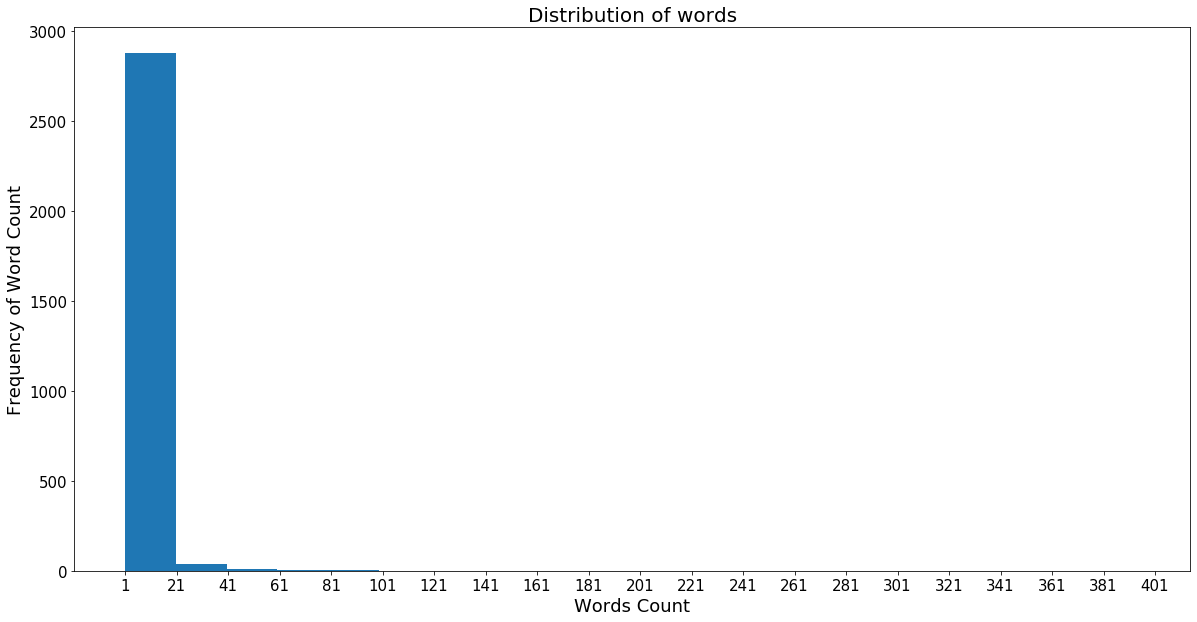

In [25]:
scrumVals = filteredScrumRdd.map(lambda x: x[1]).collect()
plt.figure(figsize = (20,10))
xTicks,xTicksName = findAxisCordinatesAndNamesForTicks(scrumVals)

plt.hist(scrumVals, bins = 20)
plt.yticks(fontsize=15)
plt.xticks(xTicks,xTicksName,fontsize = 15)
plt.xlabel('Words Count',fontsize=18)
plt.ylabel('Frequency of Word Count',fontsize=18)
plt.title('Distribution of words',fontsize=20)
plt.show()

Here we can see that most of the values are between 1 - 21 so to get a more distributed distribution we can take values log to base 10 for plotting the distribution

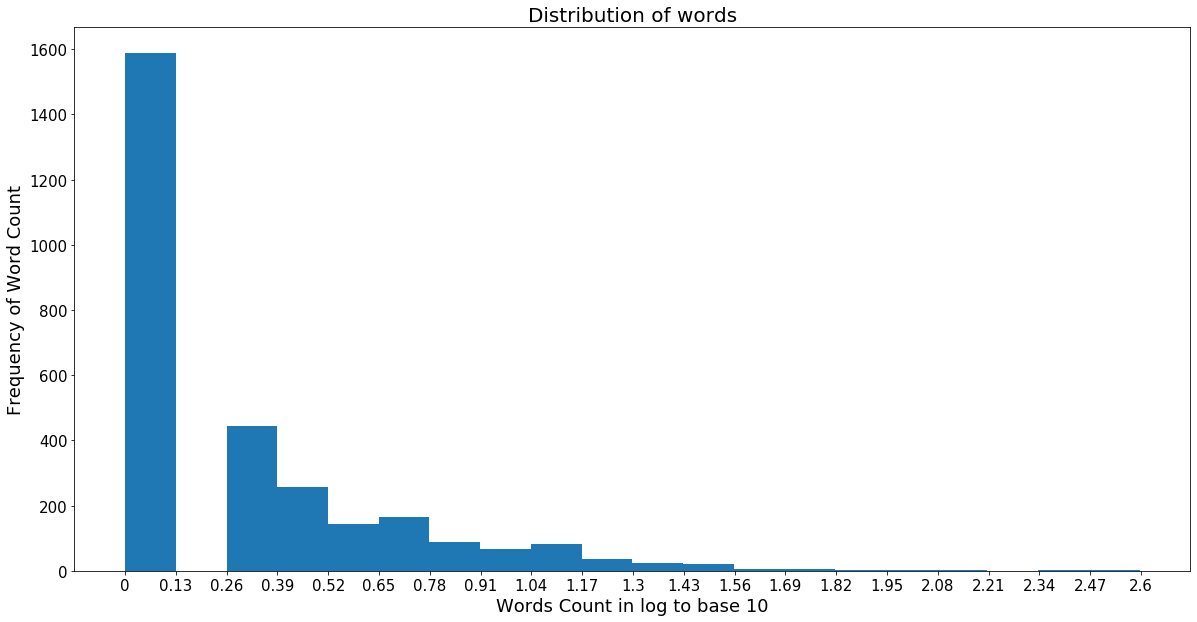

In [26]:
scrumVals = filteredScrumRdd.map(lambda x: log10(x[1])).collect()
plt.figure(figsize = (20,10))
xTicks,xTicksName = findAxisCordinatesAndNamesForTicks(scrumVals)
plt.hist(scrumVals, bins = 20)
plt.yticks(fontsize=15)
plt.xticks(xTicks,xTicksName,fontsize = 15)
plt.xlabel('Words Count in log to base 10',fontsize=18)
plt.ylabel('Frequency of Word Count',fontsize=18)
plt.title('Distribution of words',fontsize=20)
plt.show()

Here we can see that the maximum frequency is between 0 and 0.13 and mostly the freqency reduces as the word count increases.

### For Agile Processes in Software Engineering and Extreme Programming (Book 2)

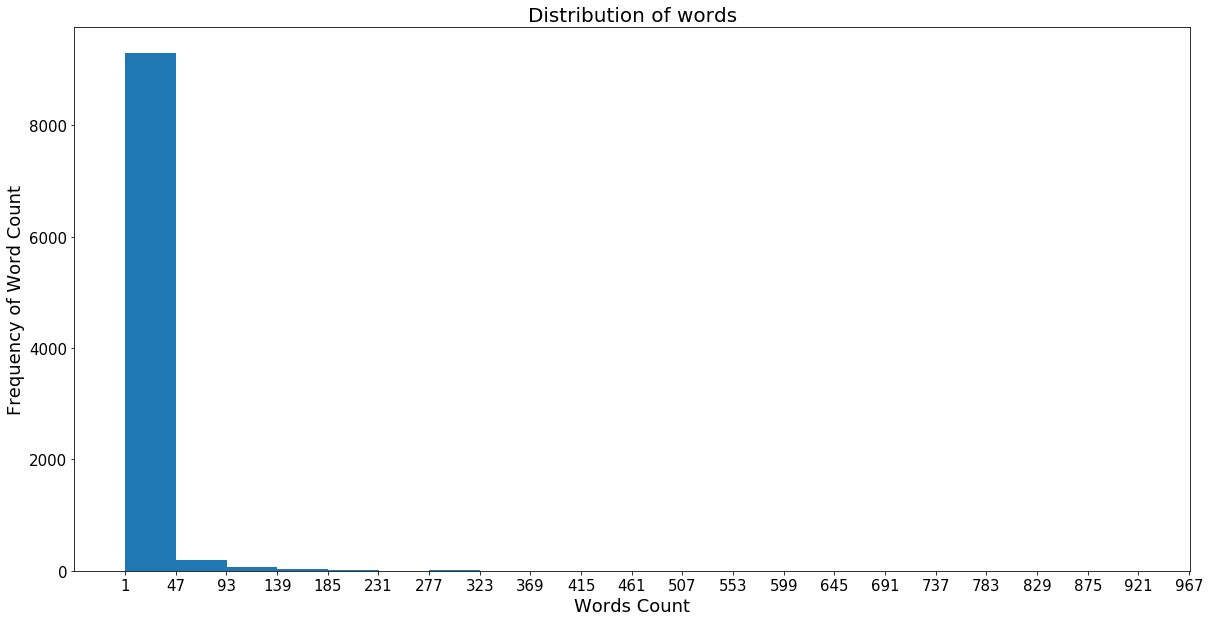

In [27]:
agileVals = filteredAgileRdd.map(lambda x: x[1]).collect()
plt.figure(figsize = (20,10))

xTicks,xTicksName = findAxisCordinatesAndNamesForTicks(agileVals)
plt.hist(agileVals, bins = 20)
plt.yticks(fontsize=15)
plt.xticks(xTicks,xTicksName,fontsize = 15)
plt.xlabel('Words Count',fontsize=18)
plt.ylabel('Frequency of Word Count',fontsize=18)
plt.title('Distribution of words',fontsize=20)
plt.show()

Here we can see that most of the values are between 0 - 50 so to get a more distributed distribution we can take values log to base 10 for plotting the distribution

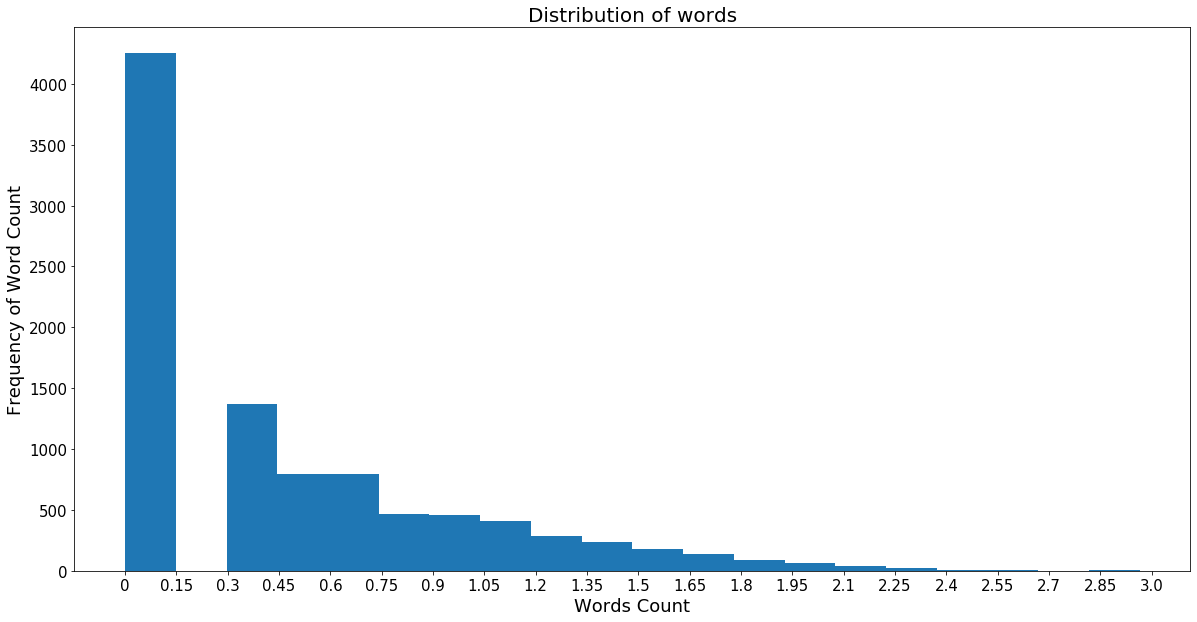

In [28]:
agileVals = filteredAgileRdd.map(lambda x: log10(x[1])).collect()
plt.figure(figsize = (20,10))

xTicks,xTicksName = findAxisCordinatesAndNamesForTicks(agileVals)
plt.hist(agileVals, bins = 20)
plt.yticks(fontsize=15)
plt.xticks(xTicks,xTicksName,fontsize = 15)
plt.xlabel('Words Count',fontsize=18)
plt.ylabel('Frequency of Word Count',fontsize=18)
plt.title('Distribution of words',fontsize=20)
plt.show()

Here we can see that the maximum frequency is between 0 and 0.15 and mostly the freqency reduces as the word count increases.

### Comparing the Top 15 words from Book1 and Book2

In [29]:
scrumTop15 = filteredScrumRdd.take(15)
agileTop15 = filteredAgileRdd.take(15)

### For Scrum HandBook (Book 1)

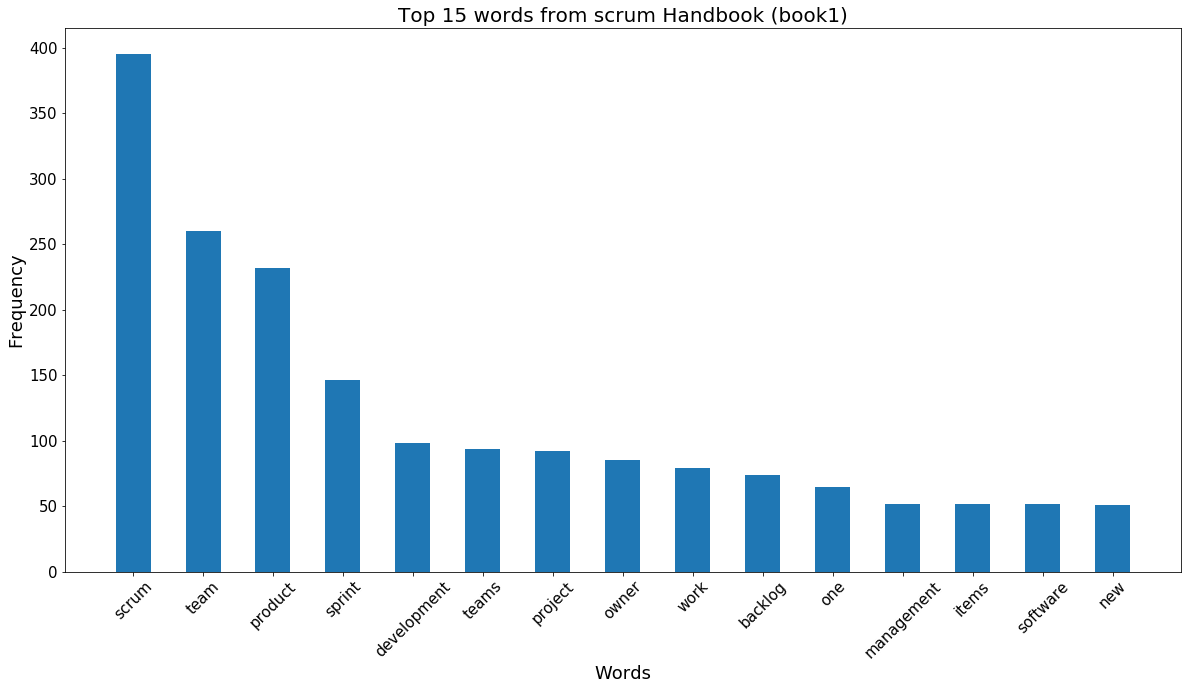

In [30]:
x_axis = [x[0] for x in scrumTop15]
y_axis = [x[1] for x in scrumTop15]

plt.figure(figsize = (20,10))
plt.bar(x_axis, y_axis, 0.5, align='center', color='C0')
plt.yticks(fontsize=15)
plt.xticks(rotation = 45, fontsize = 15)
plt.xlabel('Words',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.title('Top 15 words from scrum Handbook (book1)',fontsize=20)

plt.show()

Here we can see that the word with maximum frequency is scrum and min frequency is new out of the top 15. The top 3 words are scrum, team and product. From the Top words we can say that this book is related to scrum.

### For Agile Processes in Software Engineering and Extreme Programming (Book 2)

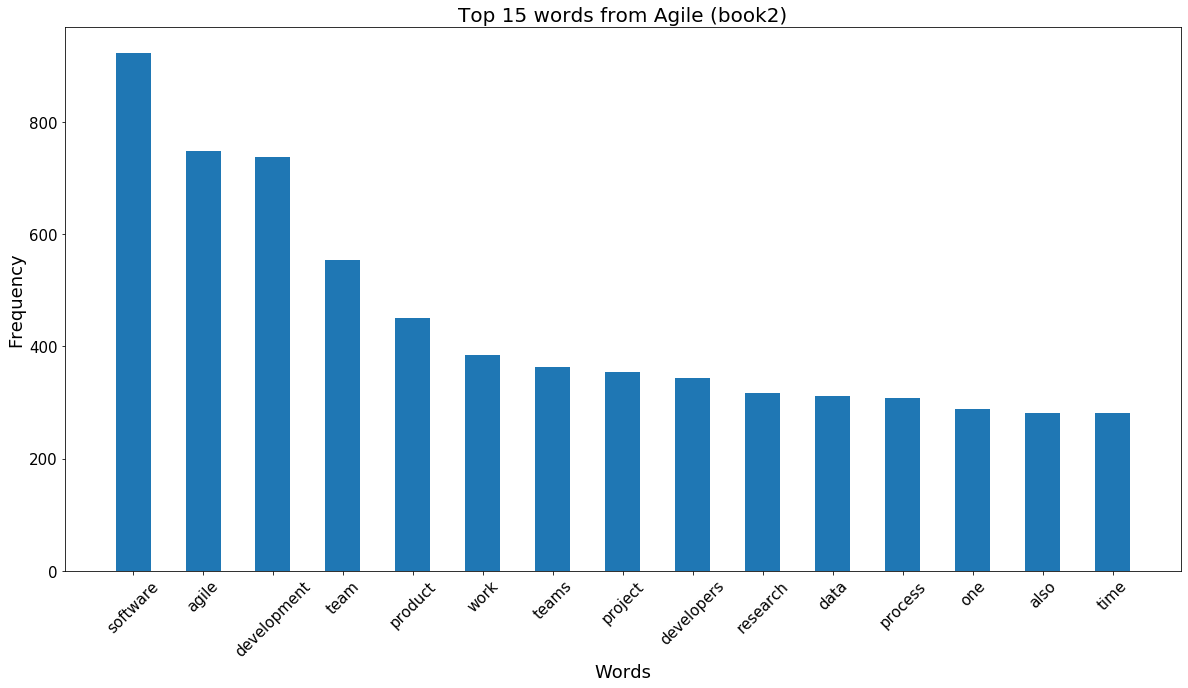

In [31]:
x_axis = [x[0] for x in agileTop15]
y_axis = [x[1] for x in agileTop15]

plt.figure(figsize = (20,10))
plt.bar(x_axis, y_axis, 0.5, align='center', color='C0')
plt.yticks(fontsize=15)
plt.xticks(rotation = 45, fontsize = 15)
plt.xlabel('Words',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.title('Top 15 words from Agile (book2)',fontsize=20)

plt.show()

Here we can see that the word with maximum frequency is software and min frequency is time out of the top 15. The top 3 words are software, agile and development. From the top words we can say that this book is related to agile software development or something related to that

### Intersection of Both the books top 15 words

In [32]:
agileKeys = set([x[0] for x in agileTop15])
scrumKeys = set([x[0] for x in scrumTop15])
agileSrumIntersect = agileKeys & scrumKeys
agileIntersect = [x for x in agileTop15 if x[0] in agileSrumIntersect]
agileIntersect.sort()
scrumIntersect = [x for x in scrumTop15 if x[0] in agileSrumIntersect]
scrumIntersect.sort()

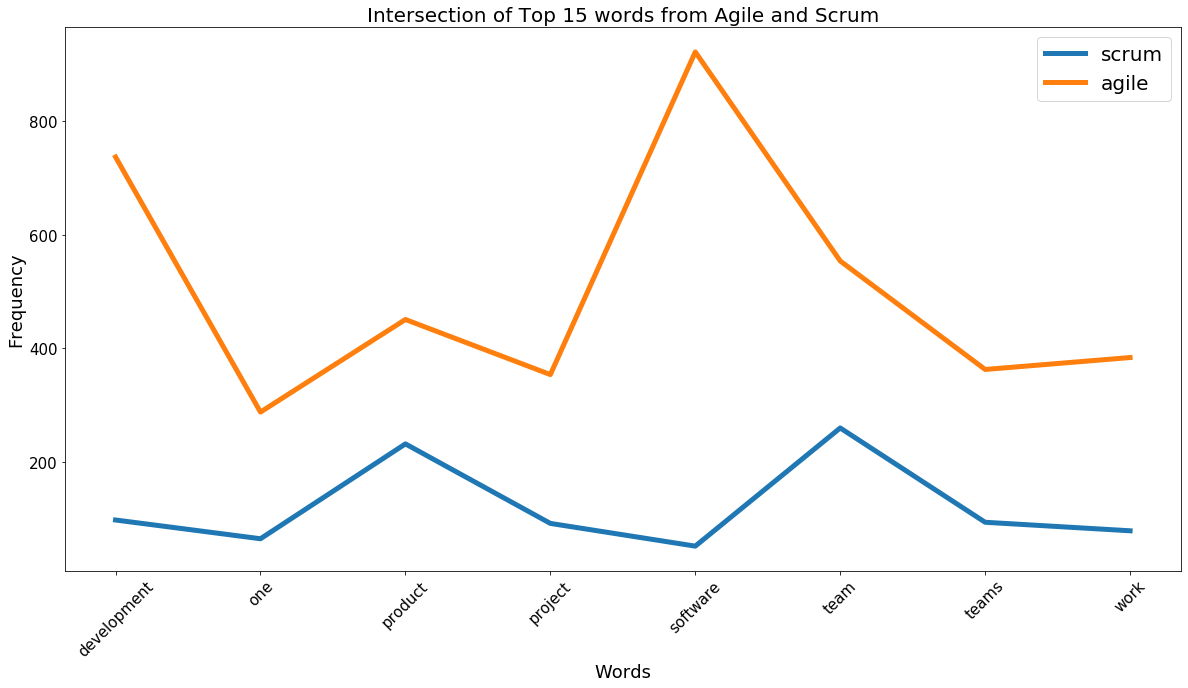

In [33]:
scrum_y_axis = [x[1] for x in scrumIntersect]
agile_y_axis = [x[1] for x in agileIntersect]
intersectKeys = [x[0] for x in scrumIntersect]
bar_width = 0.4

x_pos = [x for x in range(len(scrumIntersect))]
agile_x_pos = [x + bar_width for x in x_pos]
mid_x_pos = [x + (0.5*bar_width) for x in x_pos]

plt.figure(figsize = (20,10))

plt.plot(intersectKeys, scrum_y_axis, label = "scrum", linewidth=5.0)
plt.plot(intersectKeys, agile_y_axis, label = "agile", linewidth=5.0)
plt.yticks(fontsize=15)
plt.xticks(rotation = 45, fontsize = 15)
plt.xlabel('Words',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.title('Intersection of Top 15 words from Agile and Scrum',fontsize=20)
plt.legend(fontsize = 20)
plt.show()

Among the intersection of words between the two books we can see that software is the term with maximum frequency. So both the books should be related to some software.